# Iris(붓꽃) 예측모델
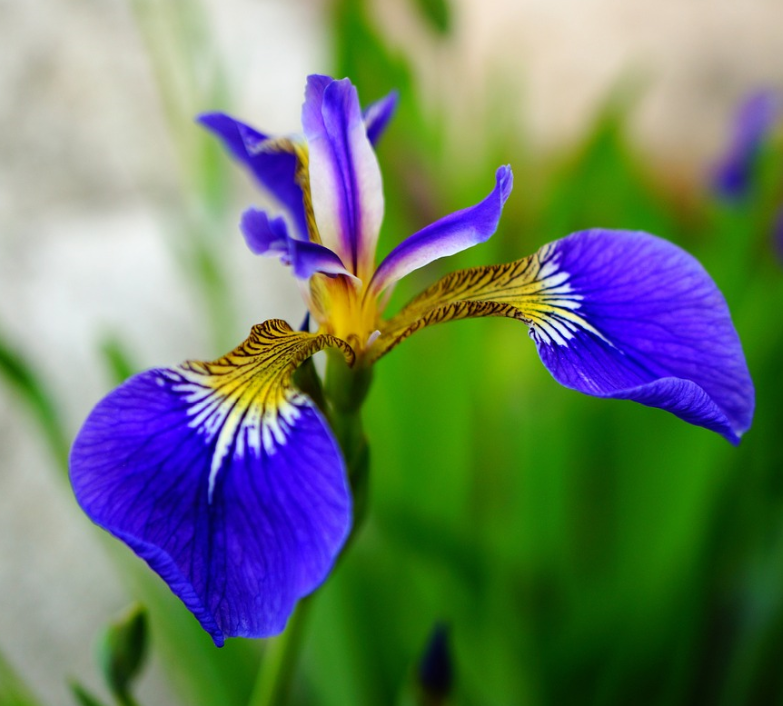

- 프랑스 국화
- 꽃말 : 좋은 소식, 잘 전해 주세요, 사랑의 메세지, 변덕스러움

## 머신러닝의 Helloworld

- 데이터 과학에서 Iris DataSet
    - 아이리스 품종 중 Setosa, Versicolor, Virginica 분류에 대한 [**로널드 피셔**](https://ko.wikipedia.org/wiki/%EB%A1%9C%EB%84%90%EB%93%9C_%ED%94%BC%EC%85%94)의  1936년 논문에서 사용된 데이터 셋.
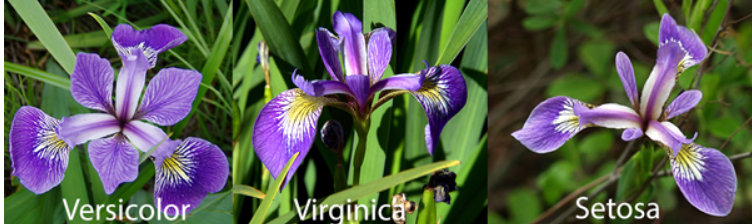



- 꽃받침(Sepal)과 꽃잎(Petal)의 길이 너비로 세개 품종을 분류
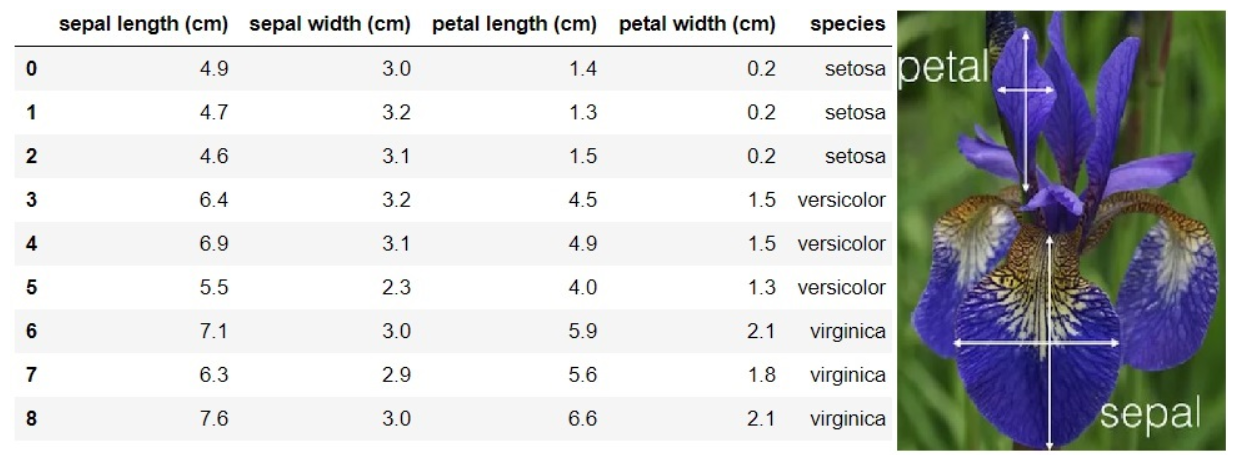

## 데이터셋 확인하기

### scikit-learn 내장 데이터셋 가져오기
- scikit-learn은 머신러닝 모델을 테스트 하기위한 데이터셋을 제공한다.
    - 이런 데이터셋을 Toy dataset이라고 한다.
- 패키지 : sklearn.datasets
- 함수   : load_xxxx()

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

### scikit-learn 내장 데이터셋의 구성
- scikit-learn의 dataset은 딕셔너리 구조의 Bunch 클래스 객체이다.
    - keys() 함수로 key값들을 조회
- 구성
    - **target_names**: 예측하려는 값(class)을 가진 문자열 배열
    - **target**: Label(출력데이터)
    - **data**: Feature(입력변수)
    - **feature_names**: 입력변수 각 항목의 이름
    - **DESCR**: 데이터셋에 대한 설명

In [ ]:
iris.keys()

In [ ]:
iris['filename']

##### target 조회

In [ ]:
print(iris.DESCR)

In [ ]:
iris.target_names

In [ ]:
iris.target

In [ ]:
iris.target.shape

##### Feature 조회

In [ ]:
iris.data

In [ ]:
iris.feature_names

In [ ]:
len(iris.feature_names)

## 위 데이터 셋을 판다스 데이터프레임으로 구성
- 데이터 프레임 생성 후 데이터 확인
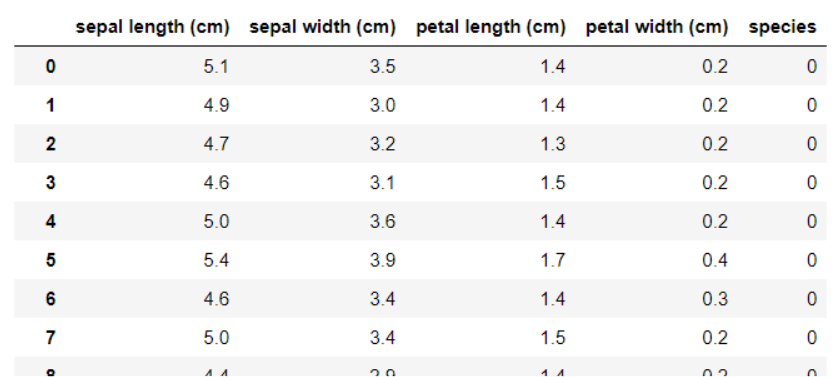

In [ ]:
import pandas as pd
df = pd.read_csv(iris['data'], 
                 header=0,
                 names=['꽃받침_길이','꽃받침_너비','꽃잎_길이','꽃잎_너비','품종'])
df.head()

In [ ]:
import numpy as np
import pandas as pd
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

In [ ]:
iris_df.head()

In [ ]:
iris_df.groupby('species').describe().T

In [ ]:
iris_df.info()

In [ ]:
iris_df.describe()

# 머신러닝을 이용한 예측

## 문제 정의
> 내가 발견한 Iris 꽃받침(Sepal)의 길이(length)와 폭(width)이 각각 5cm, 3.5cm이고 꽃의 꽃잎(Petal)의 길이와 폭은 각각 1.4cm, 0.25cm이 이었다. 이 꽃는 Iris의 무슨 종일까?

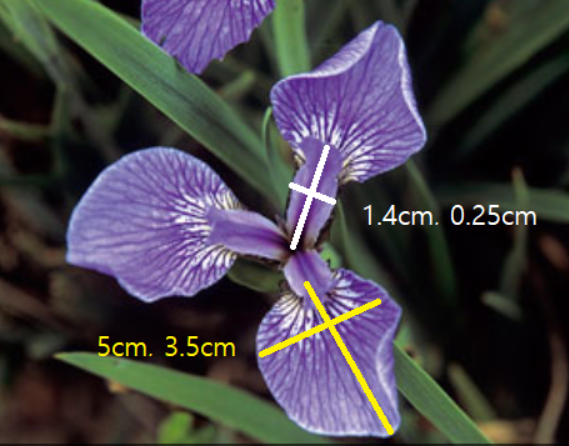

### 규칙기반으로 찾아보기

- 꽃받침(Sepal)의 길이(length): 5cm, 폭(width): 3.5cm
- 꽃잎(Petal) 의 길이(length): 1.4cm, 폭(width): 0.25cm

In [ ]:
iris_df.loc[(iris_df['sepal length (cm)']==5) & (iris_df['sepal width (cm)']==3.5)] 

## 머신러닝 적용

### 머신러닝으로 우리가 하려는 것
<font size='4'><b> 프로그래머가 직접 규칙(패턴)을 만드는  대신 컴퓨터가 데이터를 학습하여 규칙을 자동으로 만들도록 하는 것.</b></font>

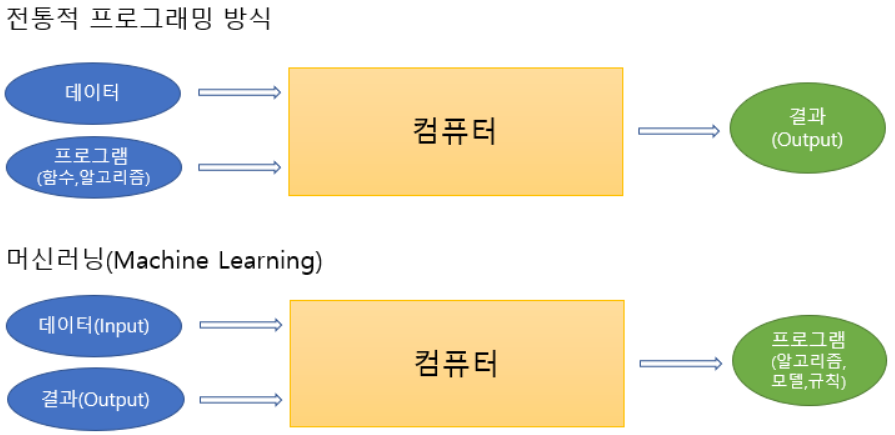

###  결정 트리(Decision Tree) 알고리즘을 이용한 분류
#### 결정 트리 알고리즘 개요
- 독립 변수의 조건에 따라 종속 변수를 분리 
- 머신러닝의 몇안되는 White box 모델
    - 결과에 대한 해석이 가능하다.
- 과적합(Overfitting)이 잘 일어나는 단점이 있다. 
- 랜덤 포레스트(Random Forest), Gradient Boosting, Adaptive boosting과 같은 Boosting 계열 앙상블이 결정트리를  기반으로 하고 있다

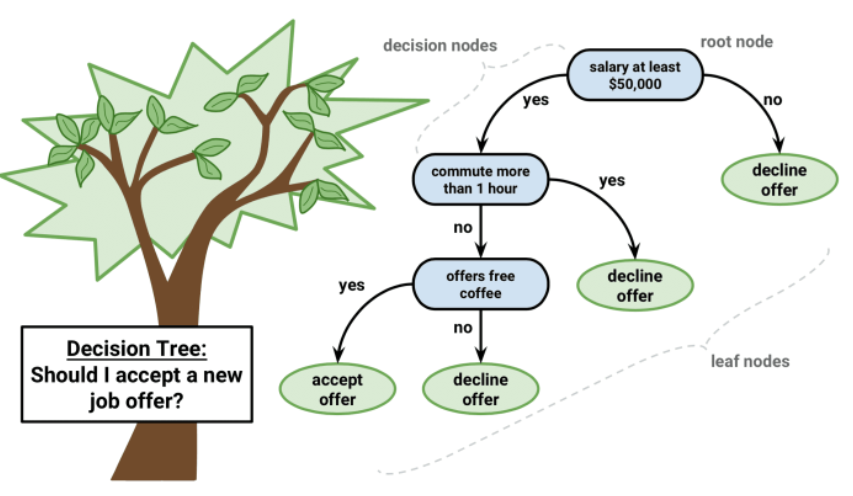

<center>[참조]www.packtpub.com</center>

#### 결정트리 모델을 이용해 머신러닝 구현
1. import 모델
2. 모델 생성
3. 모델 학습시키기
4. 예측 

##### 1. import 모델

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

##### 2. 모델생성 

In [ ]:
tree_model = DecisionTreeClassifier(max_depth=2, random_state=3)

##### 3. 모델 학습 시키기

In [ ]:
tree_model.fit(iris.data, iris.target) #feature, label

##### 4. 예측
- 내가 본 iris 꽃의 꽃잎/꽃받침의 길이, 너비를 재서 종류를 예측한다. 

In [ ]:
my_iris = np.array([[5, 3.5, 1.4, 0.25], [6.7, 3.0, 5.2, 2.2]]) 

result = tree_model.predict(my_iris)
print(result, iris.target_names[result])

In [ ]:
tree_model.predict_proba(my_iris)

# 그런데 이 결과가 맞을까?

- 모델이 추론한 결과가 맞다는 것을 어떻게 보증할 수 있을까?
- 모델을 최종 서비스에 적용하기 전에 모델의 성능을 확인하는 작업이 필요하다.

## 머신러닝 프로세스

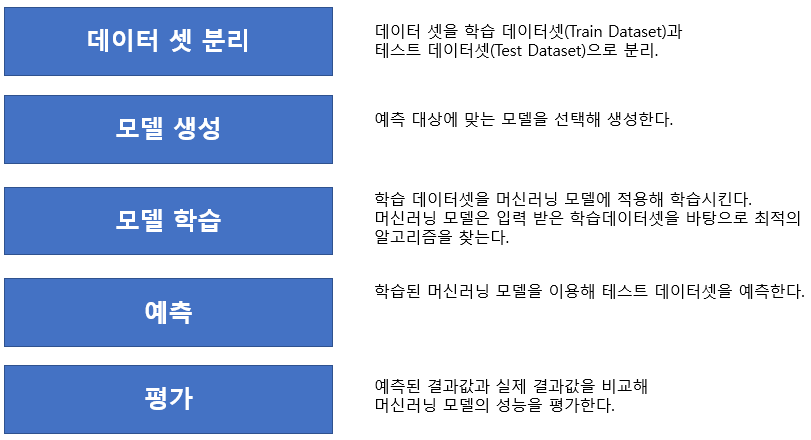

### 훈련데이터셋과 평가(테스트)데이터 분할
- 위의 예는 우리가 만든 모델이 성능이 좋은 모델인지 나쁜 모델인지 알 수 없다.
- 전체 데이터 셋을 두개의 데이터셋으로 나눠 하나는 모델을 훈련할 때 사용하고 다른 하나는 그 모델을 평가할 때 사용한다.
- 보통 훈련데이터와 테스트데이터의 비율은 8:2 또는 7:3 정도로 나누는데 데이터셋이 충분하다면 6:4까지도 나눈다.

#### 데이터셋 분할시 주의
- 분류 문제의 경우 각 클래스(분류대상)가 같은 비율로 나뉘어야 한다. 

### scikit-learn의  train_test_split() 함수를 이용해 iris 데이터셋 분할

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, 
                                                    iris.target, 
                                                    test_size=0.2,
                                                    random_state=12,
                                                    stratify = iris.target)
X_train.shape, X_test.shape, y_train.shape, y_test.shape                                               

In [ ]:
print(np.unique(y_train, return_counts=True))
print(np.unique(y_test, return_counts=True))

### 모델생성

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=2, random_state=12)

### 모델 학습

In [ ]:
tree_model.fit(X_train, y_train)

### 평가
- 머신러닝 평가지표 함수들은 sklearn.metrics 모듈에 있다.
- accuracy(정확도)
    - 전체 데이터셋중 맞춘 개수의 비율

In [ ]:
pred_train = tree_model.predict(X_train)

pred_test = tree_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_train, pred_train)
acc_test = accuracy_score(y_test, pred_test)
print('훈련데이터셋 정확도: {}, 테스트데이터셋 정확도: {}'.format(acc_train, acc_test))

- **혼동행렬 (Confusion Matrix)** 을 통해 확인
    - 모델이 예측한 결과와 실제 정답간의 개수를 표로 제공
    - 분류의 평가 지표로 사용된다.
    - axis=0: 실제, axis=1: 예측

In [ ]:
from sklearn.metrics import confusion_matrix
train_cm = confusion_matrix(y_train, pred_train)
train_cm

In [ ]:
test_cm = confusion_matrix(y_test, pred_test)
test_cm

In [ ]:
import pandas as pd
pred_train_cm = pd.DataFrame(train_cm, columns=[['예측', '예측', '예측'], iris.target_names], index=[['실제','실제','실제'], iris.target_names])
pred_train_cm

In [ ]:
pred_test_cm = pd.DataFrame(test_cm, columns=[['예측', '예측', '예측'], iris.target_names], index=[['실제','실제','실제'], iris.target_names])
pred_test_cm